***
## Surfs Up! - SQLAlchemy & Flask Assignment
***

__Summary__

Climate analysis on Honolulu, Hawaii to help potential visitors with their trip planning

My trip start date was 2018-08-01 and my trip end date was 2018-08-08.

In this notebook is included the __Step 1__ - Climate Analysis and Exploration, to see the Step 2 - Climate App please run `app.py` located in the Flask folder.
***

__Step 1__ - Climate Analysis and Exploration

In [1]:
# Dependencies for graphs
#%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
# Dependencies for pandas and numpy
import numpy as np
import pandas as pd

In [3]:
# Dependencies to handle dates
import datetime as dt

In [4]:
# Dependencies for Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# Create an engine that provides a common interface to comunicate with the database
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the database
session = Session(engine)

In [11]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

# Using the inspector to print the column names within the 'measurement' table and its types
measure_cols = inspector.get_columns('measurement')
for column in measure_cols:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Using the inspector to print the column names within the 'measurement' table and its types
station_cols = inspector.get_columns('station')
for column in station_cols:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


__Precipitation Analysis__

In [13]:
# Retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_point = session.query(func.max(Measurement.date)).\
    order_by(func.max(Measurement.date).desc()).first()
last_year, last_month, last_day = last_point[0].split("-")
last_date = dt.date(int(last_year), int(last_month), int(last_day))
year_ago = last_date - dt.timedelta(days=366)

In [14]:
# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(Measurement.date, Measurement.prcp, Measurement.station).\
                filter(Measurement.date > year_ago).all()

In [15]:
# Save the query results as a Pandas DataFrame
prec_df = pd.DataFrame(prec_data[:], columns=['date', 'prcp', 'station'])
#prec_df.to_csv("Output/one.csv", encoding="utf-8", index=False, header=True)
# Set the index to the date column
prec_df.set_index('date', inplace=True)
# Sort the dataframe by date
prec_df.sort_index(inplace=True)
# View the results
prec_df.head(20)

,prcp,station
date,,
2016-08-23,0.00,USC00519397
2016-08-23,NaN,USC00517948
2016-08-23,1.79,USC00519281
2016-08-23,0.05,USC00514830
2016-08-23,0.15,USC00513117
2016-08-23,0.70,USC00516128
2016-08-23,0.02,USC00519523
2016-08-24,0.08,USC00519397
2016-08-24,2.15,USC00519281


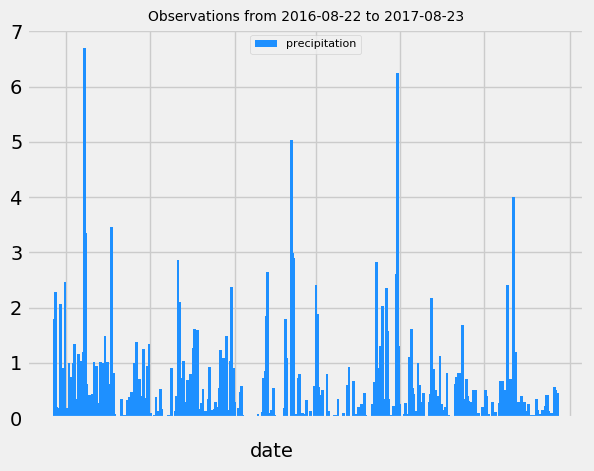

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    # Set values for the plot properties
    myFmt = DateFormatter("%m")   
    fig, ax = plt.subplots()
    ax.xaxis_date()
    ax.set_title('Observations from ' + str(year_ago) + ' to ' + str(last_date), fontsize=10)
    ax.text(.4,-.1, s = 'date', transform=ax.transAxes)

    # Plot the values
    ax.bar(prec_df.index, prec_df["prcp"], color="dodgerblue", width=2, label="precipitation")    #rgb(4, 157, 217)
    ax.xaxis.set_major_formatter(myFmt) 

    # Don't show all the dates
    ax.set_xticklabels(prec_df.index, visible=False)
  
    # Set the location for the legend
    plt.legend(loc="upper center", fontsize=8)

    # Save the Figure
    #plt.tight_layout()
    plt.savefig("../Output/precipitation.png")

    # Show the Figure
    plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


__Station Analysis__

In [18]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).count()
print("Stations available in this dataset: " + str(stations))

Stations available in this dataset: 9


In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, Station.name, func.count(Measurement.station)).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

# View the results
for record in active_stations:
    (stat, name, meas) = record
    print("Station: {0} # of observations: {1} ".format(stat, meas))    

Station: USC00519281 # of observations: 2772 
Station: USC00519397 # of observations: 2724 
Station: USC00513117 # of observations: 2709 
Station: USC00519523 # of observations: 2669 
Station: USC00516128 # of observations: 2612 
Station: USC00514830 # of observations: 2202 
Station: USC00511918 # of observations: 1979 
Station: USC00517948 # of observations: 1372 
Station: USC00518838 # of observations: 511 


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

# Only print two decimals to temperature average
avg_temp = round(float(most_active[2]),2)

# View the results
print("The most active station 'USC00519281' has the following temperature records:\n")
print("Lowest: {0}    Highest: {1}    Average: {2}  ".format(most_active[0], most_active[1], (avg_temp)))

The most active station 'USC00519281' has the following temperature records:

Lowest: 54.0    Highest: 85.0    Average: 71.66  


In [21]:
# Query the last 12 months of temperature observation data for 
# the station with the highest number of temperature observations
most_obs_station = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.tobs).all()

# Extract the temperatures for plotting
temp_lst = []
for record in most_obs_station:
    temp_lst.append(record[0])

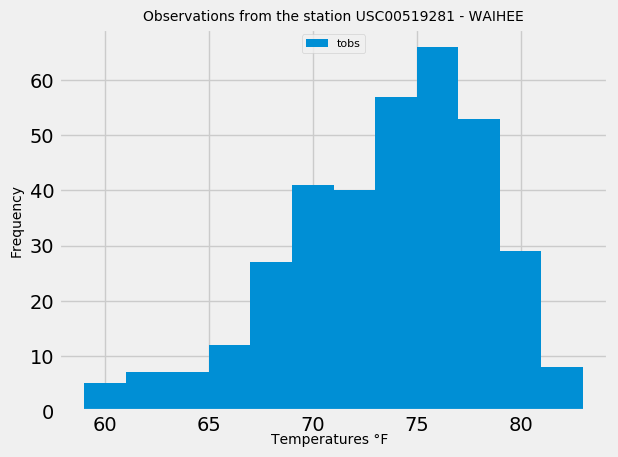

In [22]:
# Plot the results as a histogram with bins=12
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    # Set values for the plot properties
    plt.text(x = 68, y = -6, s = 'Temperatures °F', color = 'black', fontsize=10)
    plt.title('Observations from the station USC00519281 - WAIHEE', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    
    # Plot the values
    plt.hist(temp_lst, bins=12, label='tobs')

    # Set the location for the legend
    plt.legend(loc="upper center", fontsize=8)

    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/stat_temp.png")

    # Show the Figure
    plt.show()

__Temperature Analysis__

In [23]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [199]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Get the minimum, average and maximun temperatures for the year befotre my trip
# Trip start date is 2018-08-01, Trip end date is 2018-08-08
mytrip = calc_temps('2017-08-01', '2017-08-08')

# Only print two decimals to temperature average
avg_temp = round(float(mytrip[0][1]),2)

# View the results
print("The temperature records for the year previous to my trip (from August 1 to August 8, 2018) were:\n")
print("Lowest: {0}    Highest: {1}    Average: {2}  ".format(mytrip[0][0], mytrip[0][2], (avg_temp)))    

The temperature records for the year previous to my trip (from August 1 to August 8, 2018) were:

Lowest: 72.0    Highest: 83.0    Average: 79.16  


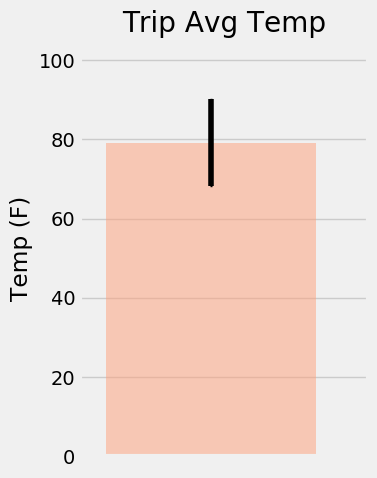

In [200]:
# Plot the results from your previous query as a bar chart. 

# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
sem = []
err = mytrip[0][2] - mytrip[0][0]
sem.append(err)

# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    # Plot average with error bar 
    fig, ax = plt.subplots(figsize=(4, 5))
    # Use the average temperature for the y value
    ax.bar(np.arange(1,2), avg_temp, yerr=sem, align='center', alpha=0.5, color='lightsalmon', ecolor='black', capsize=1)
    # Set the limits and labels
    ax.set_xlim(0.5, 1.6)
    ax.set_ylim(0.1, 105)
    ax.set_xticklabels([])
    ax.set_ylabel("Temp (F)")    
    # Use "Trip Avg Temp" as your Title
    ax.set_title("Trip Avg Temp")
    # Make the axis grid not visible
    ax.xaxis.grid(False)
    
    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/tripavg_temp.png")

    # Show the Figure
    plt.show()

## Optional Challenge Assignment

In [202]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

start ='2017-08-01'
end = '2017-08-08'

rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
    filter(Station.station == Measurement.station).\
    filter(Measurement.date >= start).\
    filter(Measurement.date <= end).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

# View the results
print("Rainfall per weather station\n")
for record in rainfall:
    print(" {0} ".format(record))        

Rainfall per weather station

 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.7) 
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.32) 
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.06) 
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.04) 
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0) 


In [45]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [203]:
# Calculate the daily normals for your trip
trip_days = []
trip_dates = []
normals = []
# Set the start and end date of the trip
start_trip = dt.datetime(2018, 8, 1)
end_trip = dt.datetime(2018, 8, 8)

# Use the start and end date to create a range of dates
duration_trip = (end_trip - start_trip).days + 1 #inclusive

# Stip off the year and save a list of %m-%d strings
for day_number in range(duration_trip):
    current_date = (start_trip + dt.timedelta(days = day_number)).date()
    trip_days.append(str(current_date.strftime("%m-%d")))
    trip_dates.append(str(current_date.strftime("%Y-%m-%d")))

# Loop through the list of %m-%d strings and calculate the normals for each date
for day in trip_days:
    result = daily_normals(day)
    # push each tuple of calculations into a list called `normals`
    normals.append(result[0])    
    
print(normals)


[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0), (68.0, 76.5576923076923, 83.0)]


In [204]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
temps_df = pd.DataFrame(np.array(normals).reshape(duration_trip,3), columns = list(['tmin', 'tavg', 'tmax']))
dates_df = pd.DataFrame.from_dict({'date': trip_dates}, orient='index').T
daily_df = pd.concat([dates_df,temps_df], axis=1, sort="False")
daily_df.set_index('date', inplace=True)
daily_df

,tmin,tavg,tmax
date,,,
2018-08-01,67.0,75.540000,83.0
2018-08-02,68.0,75.603774,84.0
2018-08-03,70.0,76.611111,85.0
2018-08-04,69.0,76.711538,84.0
2018-08-05,69.0,76.148148,82.0
2018-08-06,67.0,76.250000,83.0
2018-08-07,71.0,77.156863,83.0
2018-08-08,68.0,76.557692,83.0


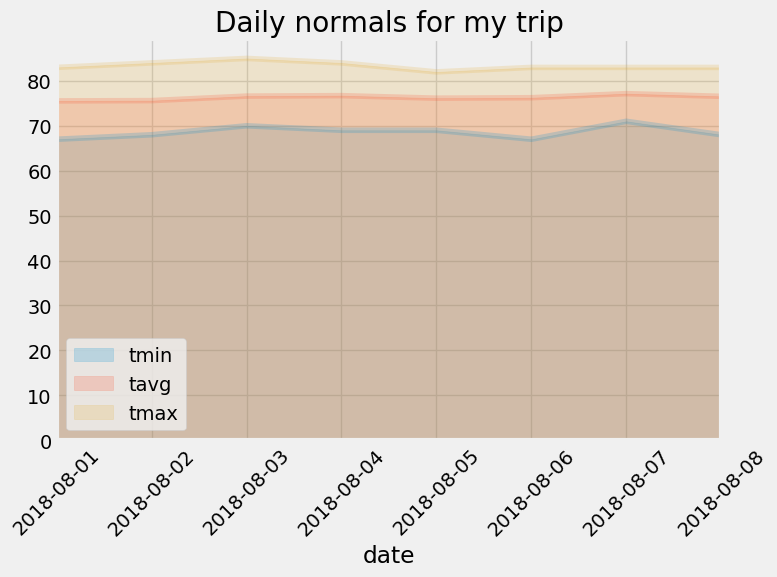

In [209]:
# Plot the daily normals as an area plot with `stacked=False`
# Use a specific syle for the plot
with plt.style.context('fivethirtyeight', after_reset=True):
    # Plot the results
    ax = daily_df.plot.area(figsize=(8,6), stacked=False, alpha=.2)
    ax.set_xticklabels(daily_df.index.values, rotation=45)
    ax.set_title("Daily normals for my trip")
    ax.margins(0, 0)
    
    # Save the Figure
    plt.tight_layout()
    plt.savefig("../Output/daily_normals.png")

    # Show the Figure
    plt.show()